In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train = pd.read_json('cooking_train.json')
test = pd.read_json('cooking_test.json')
train

,cuisine,id,ingredients
0,chinese,29565,"[romaine lettuce, sliced almonds, vegetable oi..."
1,italian,15528,"[pistachios, dried fig, bread ciabatta, extra-..."
2,cajun_creole,38015,"[olive oil, lemon, chili sauce, shrimp, butter..."
3,italian,20511,"[fresh basil, olive oil, potato gnocchi, garli..."
4,chinese,44111,"[honey, portabello mushroom, tamari soy sauce,..."
...,...,...,...
29995,cajun_creole,40418,"[powdered sugar, dry yeast, whole milk, all-pu..."
29996,filipino,19442,"[sugar, corn starch, salt, water, soy sauce, b..."
29997,mexican,5301,"[tomatoes, pasilla chiles, radishes, garlic, l..."
29998,japanese,2357,"[green tea, baking powder, egg yolks, cake flo..."


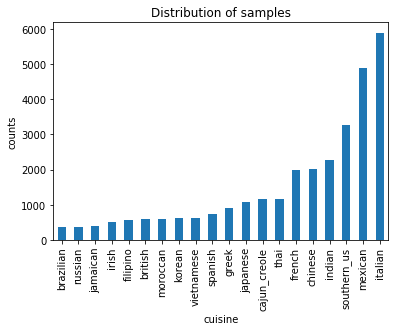

In [2]:
plot = train.groupby('cuisine')['id'].count().sort_values().plot(kind='bar')

plot.set_xlabel("cuisine")
plot.set_ylabel("counts")
plt.title("Distribution of samples")
plt.show()

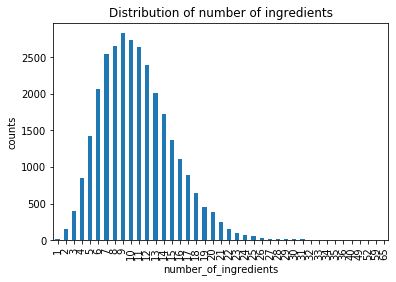

In [3]:
train['number_of_ingredients'] = train['ingredients'].str.len()
plot = train.groupby('number_of_ingredients')['id'].count().plot(kind='bar')
plot.set_xlabel("number_of_ingredients")
plot.set_ylabel("counts")
plt.title("Distribution of number of ingredients")
plt.show()

cuisine
brazilian        9.713068
british          9.638333
cajun_creole    12.561207
chinese         11.997021
filipino        10.003546
french           9.808371
greek           10.169265
indian          12.728228
irish            9.287149
italian          9.908551
jamaican        12.133663
japanese         9.836431
korean          11.350649
mexican         10.814368
moroccan        12.919008
russian         10.319444
southern_us      9.610061
spanish         10.392713
thai            12.589347
vietnamese      12.690323
Name: number_of_ingredients, dtype: float64


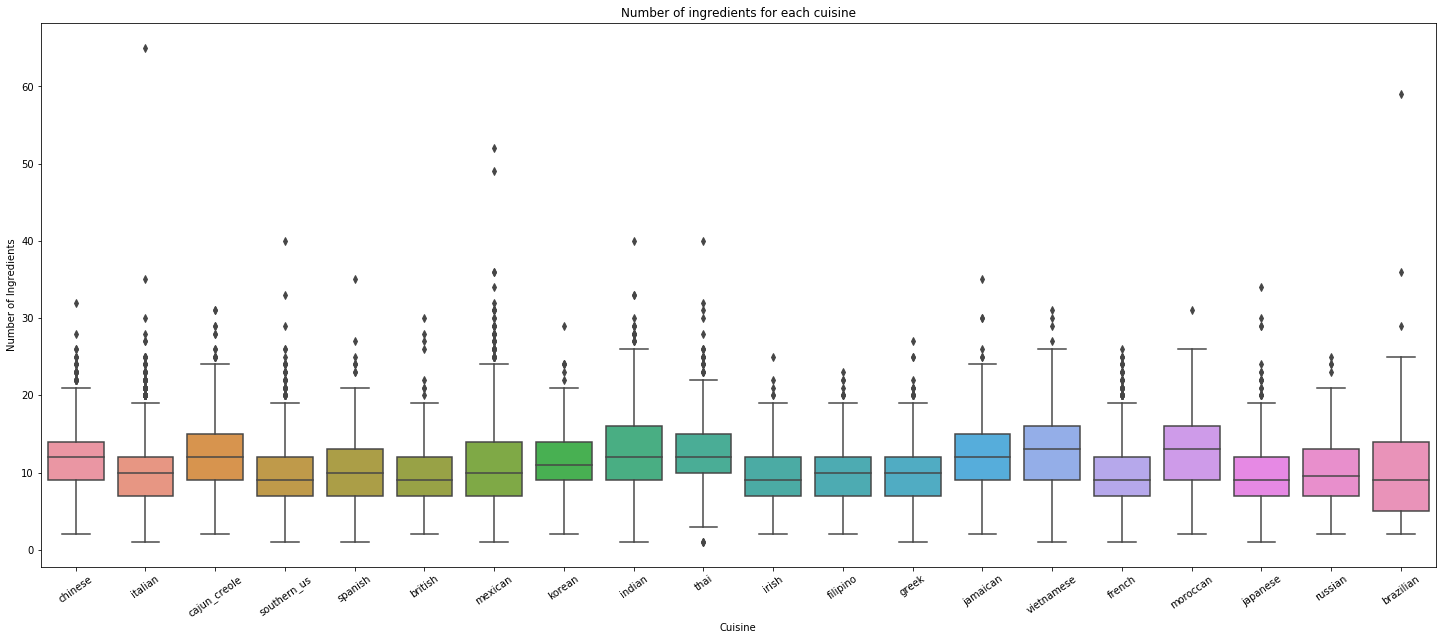

In [4]:
plt.figure(figsize=(25,10))
print(train.groupby('cuisine')['number_of_ingredients'].mean())
ax = sns.boxplot(x='cuisine', y='number_of_ingredients', data=train)
plt.ylabel('Number of Ingredients')
plt.xlabel('Cuisine')
plt.title("Number of ingredients for each cuisine")
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.show()

<Figure size 1080x432 with 0 Axes>

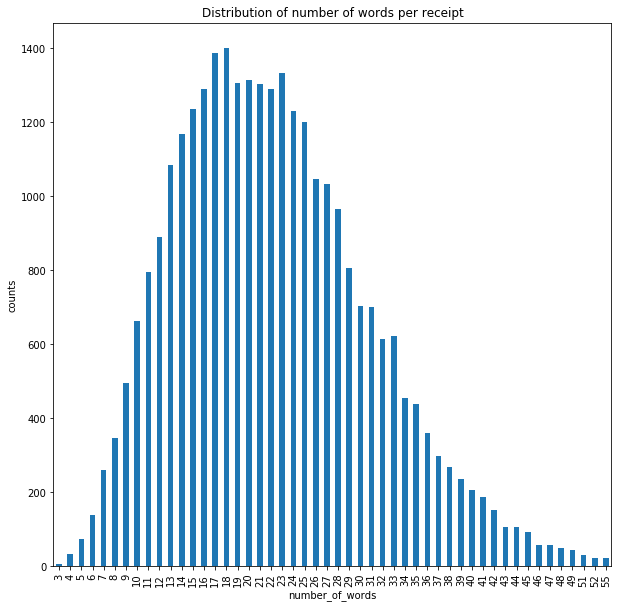

In [5]:
plt.figure(figsize=(15,6))
train['number_of_words'] = train['ingredients'].apply(lambda x: len(' '.join(x).split(sep=' ')))
fig, ax = plt.subplots(figsize=(10,10))  
plot = train.groupby('number_of_words')['id'].count().plot(kind='bar')
train[train['cuisine'] == 'chinese'].groupby('number_of_words')['id'].count().plot(kind='bar')
plot.set_xlabel("number_of_words")
plot.set_ylabel("counts")
plt.title("Distribution of number of words per receipt")
plt.show()

cuisine
brazilian       17.187500
british         16.825000
cajun_creole    24.144828
chinese         23.138530
filipino        16.459220
french          18.797277
greek           19.955457
indian          22.298906
irish           16.263052
italian         19.863590
jamaican        21.205446
japanese        16.914498
korean          20.071429
mexican         20.825420
moroccan        23.631405
russian         17.330556
southern_us     17.772256
spanish         19.960864
thai            24.802405
vietnamese      23.191935
Name: number_of_words, dtype: float64


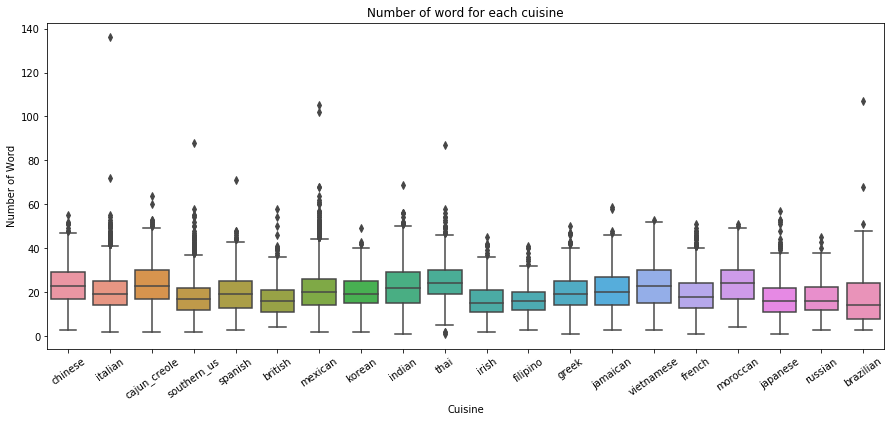

In [6]:
plt.figure(figsize=(15,6))
print(train.groupby('cuisine')['number_of_words'].mean())
ax = sns.boxplot(x='cuisine', y='number_of_words', data=train)
plt.ylabel('Number of Word')
plt.xlabel('Cuisine')
plt.title("Number of word for each cuisine")
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.show()

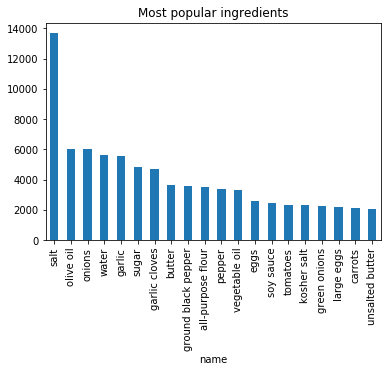

In [7]:
train['words_per_ingredient'] = train['number_of_ingredients'] / train['number_of_words']
train['words_per_ingredient'].mean()

unique_ingredients = []
for arr in train.ingredients:
    unique_ingredients = unique_ingredients + list(set(arr) - set(unique_ingredients))    

ingredients = {}

for ing in unique_ingredients:
    ingredients[ing] = 0

for l in train.ingredients:
    for element in l:
        ingredients[element] += 1
most_ingredients = [(k, ingredients[k]) for k in sorted(ingredients, key=ingredients.get, reverse=True)]

df1 = pd.DataFrame(most_ingredients[:20], columns = ['name' , 'count'])
df1.groupby('name').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plot.set_xlabel("ingredients")
plot.set_ylabel("counts")
plt.title("Most popular ingredients")
plt.show()

pepper 19334
salt 18469
oil 17639
garlic 14256
ground 13740
fresh 13505
sauce 9849
sugar 9393
onions 9293
cheese 8938
chicken 8682
olive 8199
black 8017
water 7386
red 6951
flour 6697
butter 6559
tomatoes 6519
green 6430
powder 6252


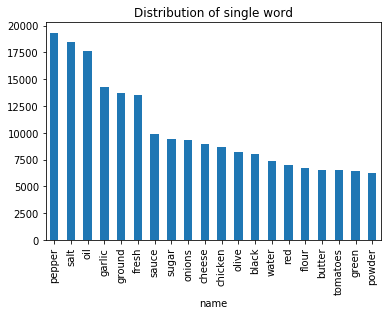

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def preprocessor(line):
    return ' '.join(line).lower()

def get_word_freq(corpus,n_gram=(1,1)):
    vec = CountVectorizer(preprocessor=preprocessor,ngram_range=n_gram).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    return [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

def get_top_n_words(corpus, n=None, n_gram=(1,1)):
    words_freq = get_word_freq(corpus,n_gram)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_least_n_words(corpus, n=None, n_gram=(1,1)):
    words_freq = get_word_freq(corpus,n_gram)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

common_words = get_top_n_words(train['ingredients'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['name' , 'count'])
df1.groupby('name').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plot.set_xlabel("words")
plot.set_ylabel("counts")
plt.title("Distribution of single word")
plt.show()
#Mozna zauwazyc, ze nie ma za duzo stop wordow

In [9]:
common_words = get_least_n_words(train['ingredients'], 200)
for word, freq in common_words:
    print(word, freq)

bens 1
sato 1
mentaiko 1
beverages 1
house 1
marrons 1
energy 1
grind 1
despelette 1
jambon 1
bayonne 1
bee 1
pollen 1
fiddlehead 1
ferns 1
dew 1
hogue 1
devil 1
st 1
germain 1
capon 1
chilcostle 1
america 1
taiwanese 1
foccacia 1
ornamental 1
dangmyun 1
ms 1
brittle 1
vital 1
tuaca 1
basa 1
kinchay 1
kamut 1
snaps 1
nigari 1
doubanjiang 1
cavenders 1
haricot 1
ficelle 1
master 1
tyson 1
absinthe 1
bear 1
tangzhong 1
nugget 1
carambola 1
poi 1
miswa 1
katsuo 1
bushi 1
doubl 1
beetroot 1
bai 1
cai 1
creations 1
budweiser 1
wingettes 1
makers 1
mark 1
unagi 1
boar 1
macarons 1
fisher 1
dinosaur 1
kha 1
rusk 1
mae 1
ploy 1
ikura 1
shiromiso 1
cornstarch 1
arak 1
moose 1
multi 1
hoop 1
tradit 1
filled 1
herbsaint 1
freeze 1
jujubes 1
suckling 1
biga 1
saltpeter 1
ascorbic 1
peapods 1
jose 1
cuervo 1
chowchow 1
creami 1
pompano 1
breader 1
grassfed 1
tapatio 1
topside 1
crosswise 1
lox 1
standing 1
dragees 1
passover 1
romana 1
racks 1
blackened 1
muscovy 1
chopmeat 1
torpedo 1
masur 1
guin

In [10]:
all_words_train = get_top_n_words(train['ingredients'])
all_words_test = get_top_n_words(test['ingredients'])
list_word_train = [word for word,freq in all_words_train]
list_word_test = [word for word,freq in all_words_test]
not_used_again = list(set(list_word_train) - set(list_word_test))

In [11]:
all_words_train = get_top_n_words(train['ingredients'])
all_words_test = get_top_n_words(test['ingredients'])
list_word_train = [word for word,freq in all_words_train]
list_word_test = [word for word,freq in all_words_test]
not_used_again = list(set(list_word_train) - set(list_word_test))

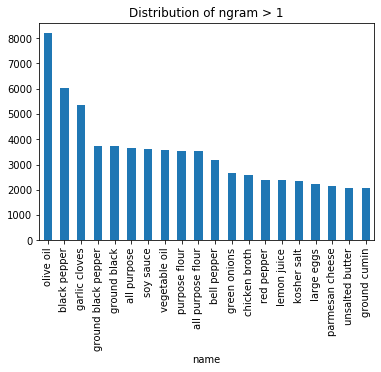

In [12]:
common_words = get_top_n_words(train['ingredients'], 20 ,n_gram=(2,4))
df1 = pd.DataFrame(common_words, columns = ['name' , 'count'])
df1.groupby('name').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plot.set_xlabel("words")
plot.set_ylabel("counts")
plt.title("Distribution of ngram > 1")
plt.show()


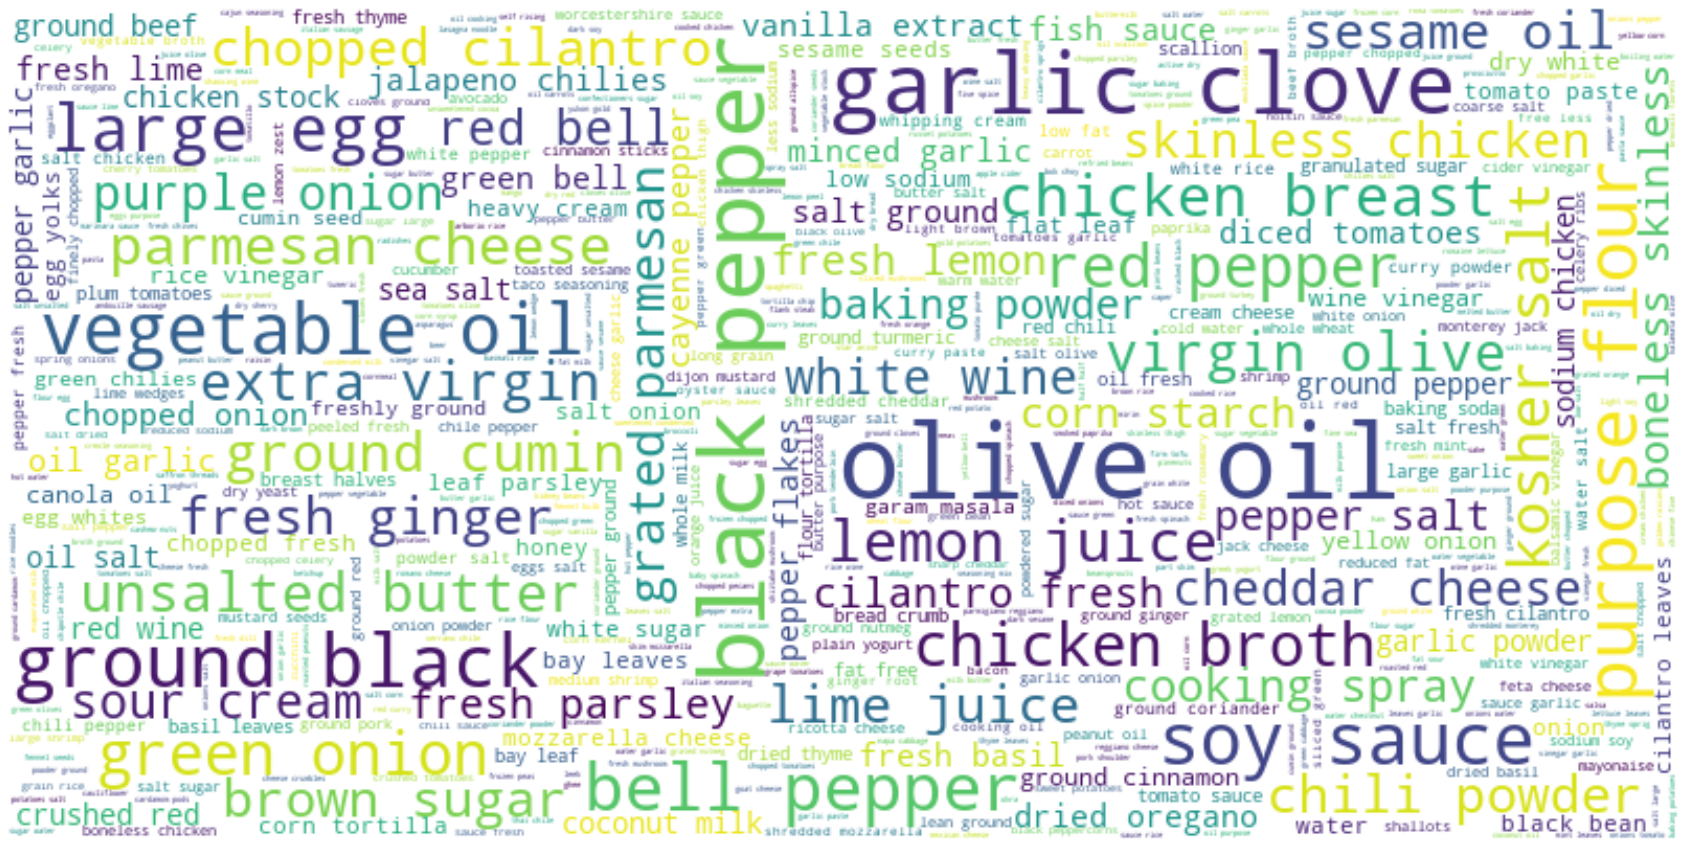

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(preprocessor(review) for review in train.ingredients)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
fig, ax = plt.subplots(figsize=(30,30))  
wordcloud = WordCloud(width=800, height=400,max_font_size=50, max_words=600, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.savefig("img/cuisine.png", format="png")
plt.show()

In [14]:
train['cuisine'].unique()

array(['chinese', 'italian', 'cajun_creole', 'southern_us', 'spanish',
       'british', 'mexican', 'korean', 'indian', 'thai', 'irish',
       'filipino', 'greek', 'jamaican', 'vietnamese', 'french',
       'moroccan', 'japanese', 'russian', 'brazilian'], dtype=object)

In [15]:
china = " ".join(preprocessor(review) for review in train[train["cuisine"]=="chinese"].ingredients)
italian = " ".join(preprocessor(review) for review in train[train["cuisine"]=="italian"].ingredients)
british = " ".join(preprocessor(review) for review in train[train["cuisine"]=="british"].ingredients)
french = " ".join(preprocessor(review) for review in train[train["cuisine"]=="french"].ingredients)

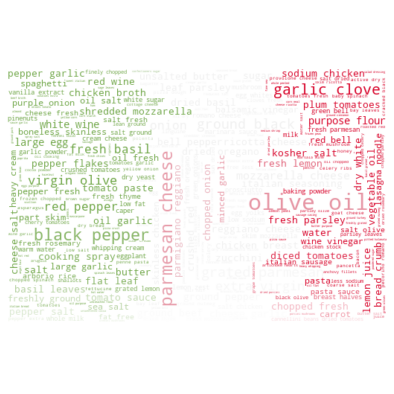

In [16]:
from PIL import Image
mask = np.array(Image.open("img/italy.png"))
wordcloud_usa = WordCloud(max_font_size=30,background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(italian)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/italy_cuisine.png", format="png")

plt.show()

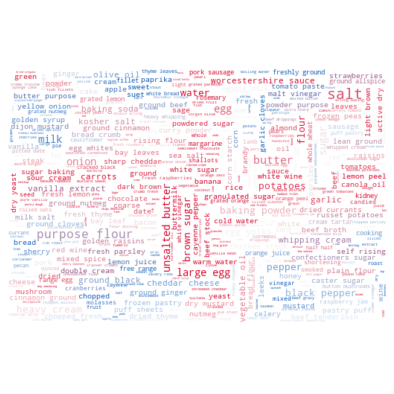

In [17]:
mask = np.array(Image.open("img/uk.png"))
wordcloud_usa = WordCloud(max_font_size=20,background_color="white", mode="RGB", max_words=1000, mask=mask).generate(british)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/uk_cuisine.png", format="png")
plt.show()

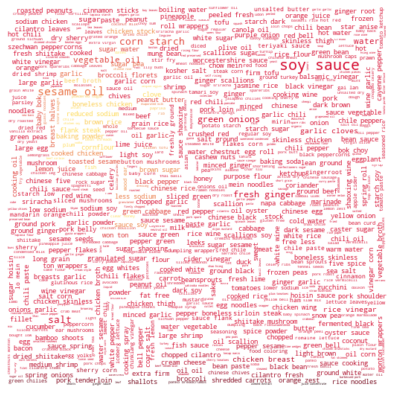

In [18]:
mask = np.array(Image.open("img/china.png"))
wordcloud_usa = WordCloud(max_font_size=20,background_color="white", mode="RGB", max_words=1000, mask=mask).generate(china)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/china_cuisine.png", format="png")

plt.show()


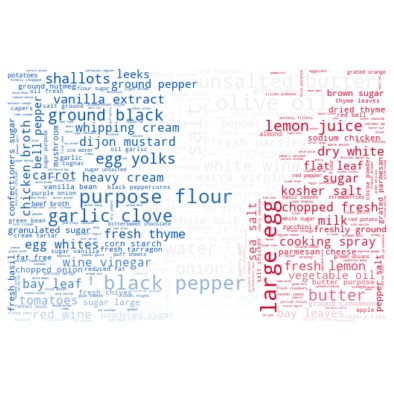

In [19]:
mask = np.array(Image.open("img/france.png"))
wordcloud_usa = WordCloud(max_font_size=30,background_color="white", mode="RGB", max_words=1000, mask=mask).generate(french)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/french_cuisine.png", format="png")

plt.show()